In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
data.shape

(100000, 9)

In [4]:
#checking type of all fields
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
#checking for null values
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

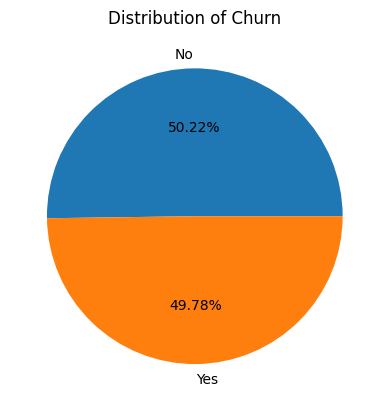

In [7]:
sizes = data['Churn'].value_counts(sort=1)
plt.pie(sizes,autopct='%1.2f%%', labels=['No', 'Yes'])
plt.title('Distribution of Churn')
plt.show()

In [8]:
data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [9]:
data['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

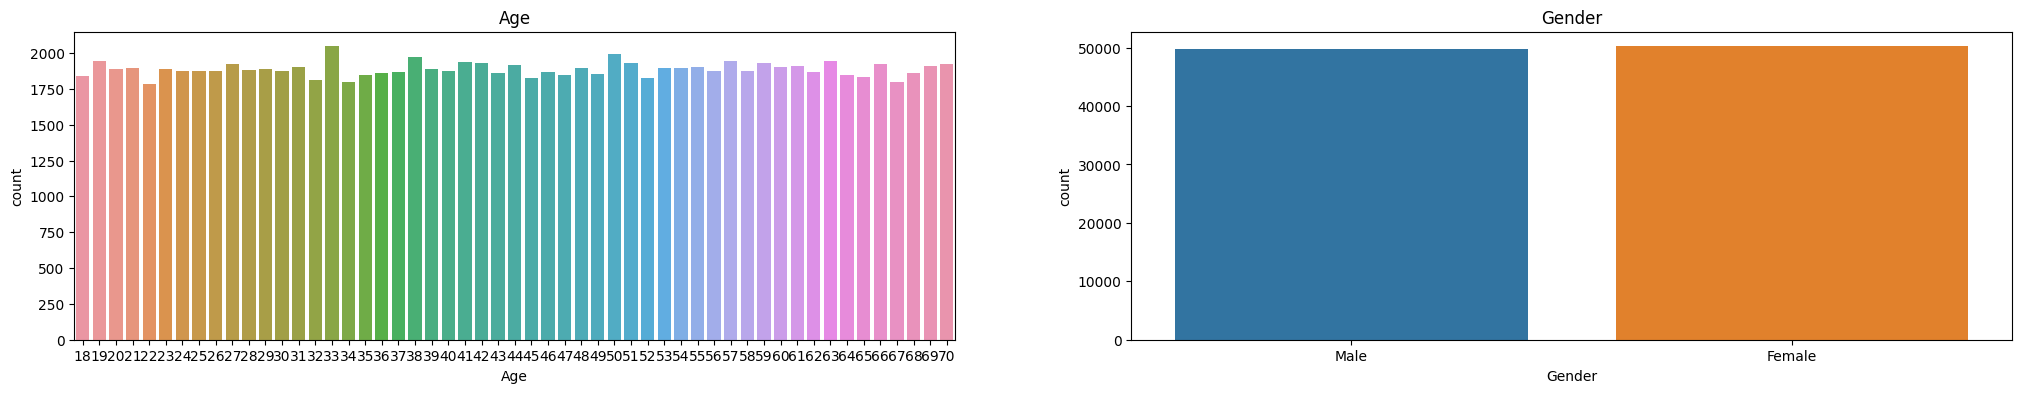

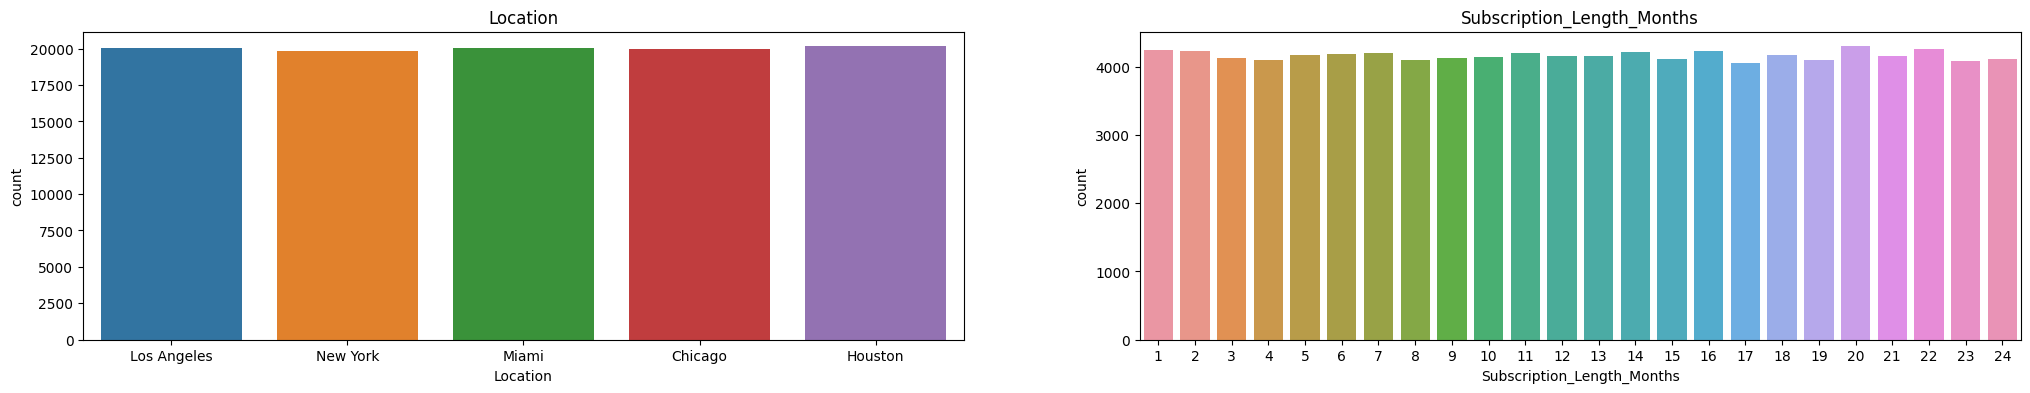

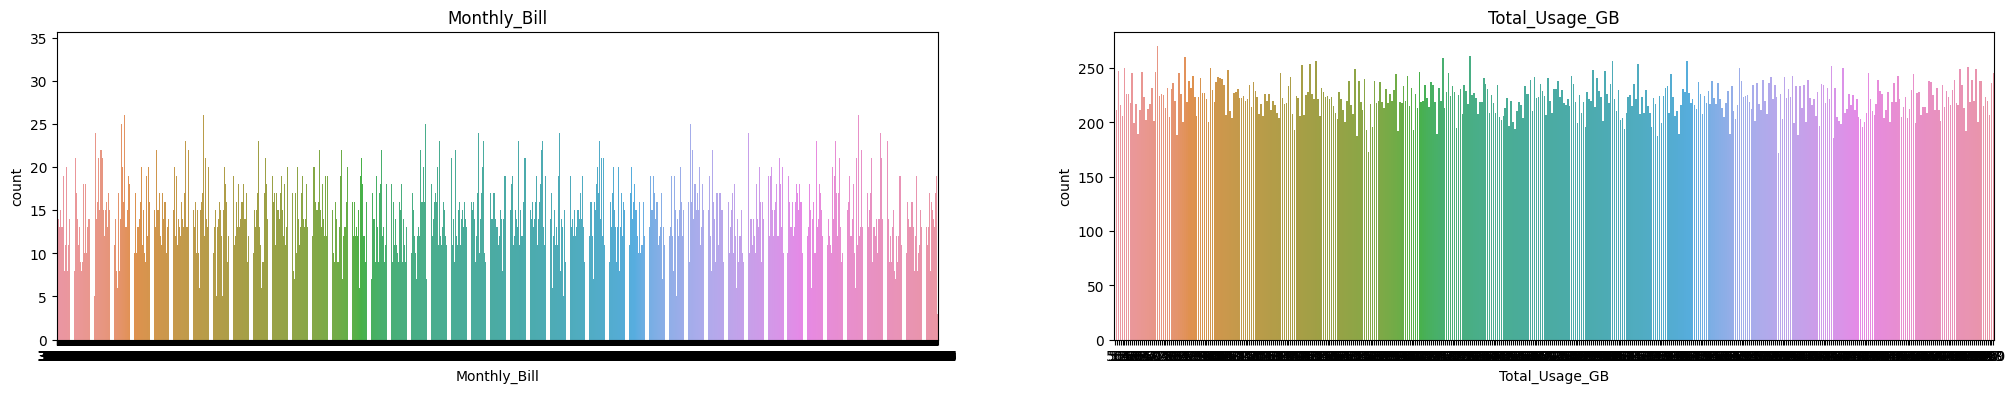

In [10]:
def function_plot(cols):
    numerical = cols
    plt.figure(figsize=(25,4))

    for i, col in enumerate(numerical):
        ax = plt.subplot(1, len(numerical), i+1)
        sns.countplot(x=str(col), data=data)
        ax.set_title(f"{col}")

function_plot(['Age','Gender'])
function_plot(["Location", "Subscription_Length_Months"])
function_plot(["Monthly_Bill","Total_Usage_GB"])


In [11]:
#No need of customer ID in the analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.
data = data.drop(["CustomerID","Name"], axis = 1)
data['Location']= data['Location'].map({'Houston':1,'Los Angeles':2,'Miami':3,'Chicago':4,'New York':5})
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})

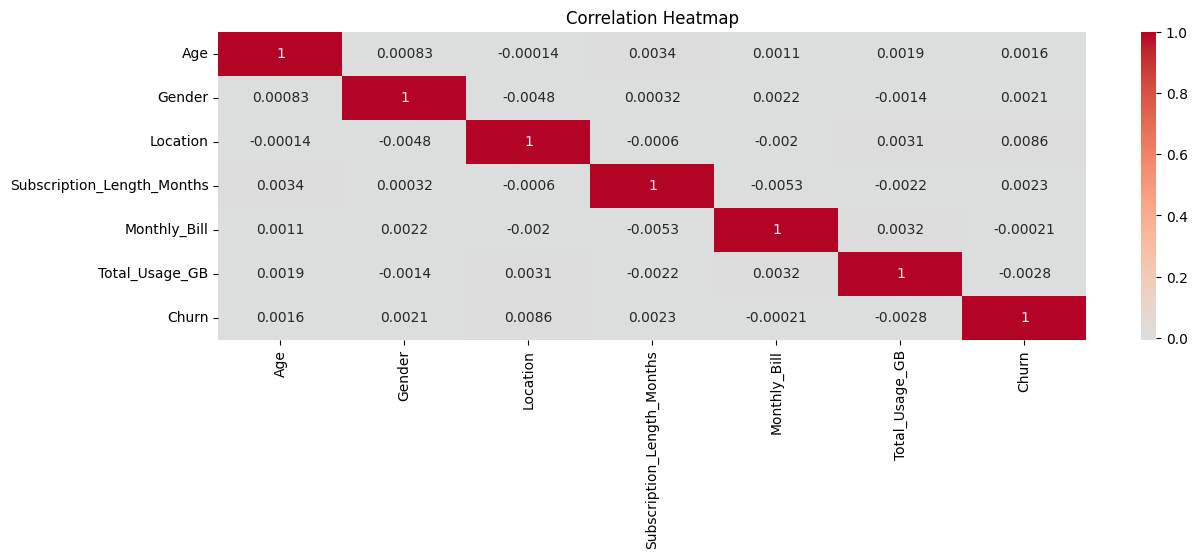

In [12]:
correlation_matrix = data.corr()
plt.figure(figsize=(14,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Heatmap')
plt.show()


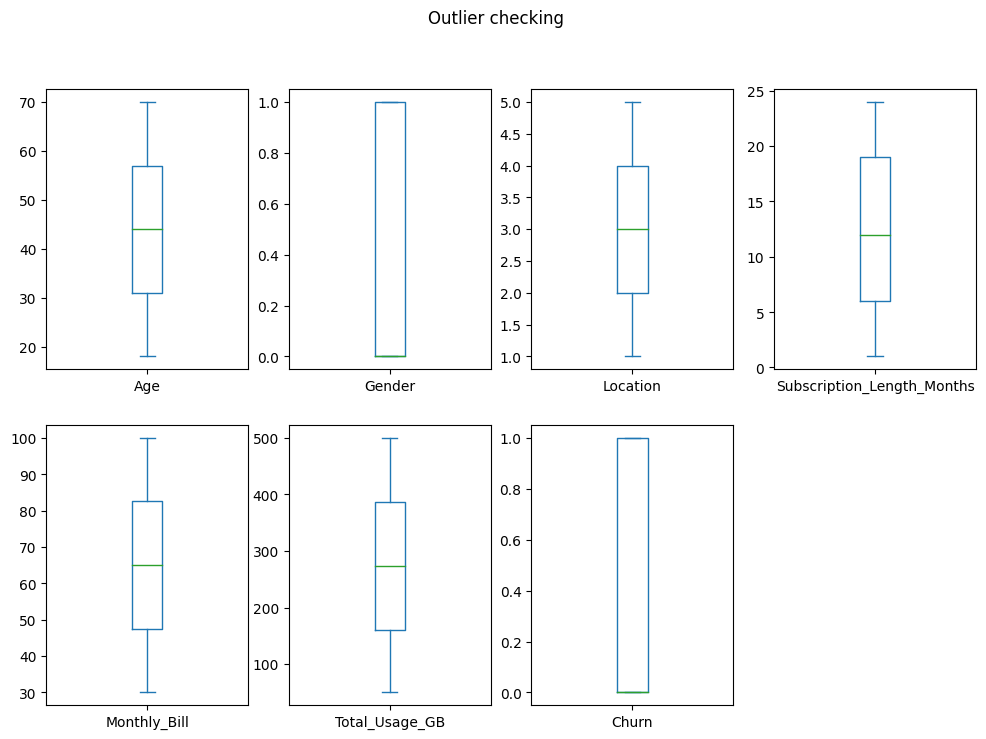

In [13]:
#check for outliers
data.plot(kind='box', subplots=True, title="Outlier checking",layout=(2, 4),figsize=(12, 8))
plt.show()

In [14]:
# Customers who churn
churn = data.loc[data["Churn"]==1]
churn

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
3,36,0,3,3,97.94,297,1
5,67,1,5,15,82.65,456,1
7,67,0,3,1,97.70,396,1
8,20,0,3,10,42.45,150,1
9,53,0,2,12,64.49,383,1
...,...,...,...,...,...,...,...
99993,20,0,1,15,84.72,312,1
99995,33,1,1,23,55.13,226,1
99997,64,1,4,17,96.11,251,1
99998,51,0,5,20,49.25,434,1


In [15]:
#dropping unnecessary field
x = data.drop(columns=['Churn'], axis=1)
y = data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=12345)

#Standardization
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [16]:
#function to call diff classifier
def modeling(model,algorithm_name):
    model.fit(x_train_scale, y_train)
    y_pred = model.predict(x_test_scale)
    
    #Performance evaluation
    def print_scores(algorithm_name, y_test, y_pred):
        print(algorithm_name)
        acc_score = accuracy_score(y_test, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_test, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_test, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_test, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(algorithm_name, y_test, y_pred)   

In [17]:
# Running logistic regression model
log_model = LogisticRegression()
modeling(log_model, 'Logistic Regression')

Logistic Regression
accuracy:  0.50555
precision:  0.5098284488920658
recall:  0.28532853285328535
f1_score:  0.48035277068944304


In [18]:
# SVC model
svc_model = SVC()
modeling(svc_model, 'SVC Classification')

SVC Classification
accuracy:  0.4954
precision:  0.4940650925335035
recall:  0.38713871387138715
f1_score:  0.4894168917049493


In [19]:
# Random Forest 
rf_model = RandomForestClassifier()
modeling(rf_model, "Random Forest Classification")

Random Forest Classification
accuracy:  0.49965
precision:  0.4995754616854171
recall:  0.47074707470747074
f1_score:  0.4992317533938488


In [20]:
# Decision Tree
dt_model = DecisionTreeClassifier()
modeling(dt_model, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.5026
precision:  0.5025682344646993
recall:  0.49904990499049906
f1_score:  0.5025937326787755


In [21]:
#Naive Bayes
nb_model = GaussianNB()
modeling(nb_model, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.50125
precision:  0.5020583190394511
recall:  0.2927292729272927
f1_score:  0.47858232923119093


In [22]:
#K nearest neigbour 
knn_model = KNeighborsClassifier()
modeling(nb_model, "K nearest neigbour Classification")

K nearest neigbour Classification
accuracy:  0.50125
precision:  0.5020583190394511
recall:  0.2927292729272927
f1_score:  0.47858232923119093


In [23]:
lr = LogisticRegression()

# Create param grid
param_grid = [
    {'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    }
]
# Create grid search object
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data
best_clf = clf.fit(x_train_scale, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


In [24]:
best_clf.best_params_

{'C': 1, 'max_iter': 5000, 'solver': 'sag'}

In [27]:
#fit the best model
best_log_model = best_clf.best_estimator_
modeling(best_log_model, 'Logistic Regression')

Logistic Regression
accuracy:  0.5056
precision:  0.5099160264427371
recall:  0.2854285428542854
f1_score:  0.48041734198275343


In [28]:
#Saving the trained model
import pickle
pickle.dump(best_log_model, open("customer_churn_model.pkl", "wb"))

In [31]:
#check for a input
value=best_log_model.predict([[8,1,1,2,86,50]])
if value[0]==0:
    print('Not churn')
else:
    print('Churn')

Not churn
